In [1]:
%cd ../

/home/dmoreno/pipeline_v4_final/pipeline/training/stamp_classifier/models/staging_production/stamp_full


In [2]:
import pandas as pd

In [ ]:
order_classes = [
        'agn', 'asteroid', 'bogus', 'satellite', 'sn', 'vs'
    ]

#path_results = './results/stamp_v1/predictions_test.parquet'
path_results = './results/stamp_full_1.0.0/predictions_test.parquet'
predictions = pd.read_parquet(path_results)
predictions

,agn,asteroid,bogus,satellite,sn,vs
oid,,,,,,
ZTF18acrvifj,1.221719e-05,9.903250e-01,0.000197,1.993752e-07,9.450044e-03,1.580009e-05
ZTF20abkxmgb,8.426841e-07,1.529842e-07,0.999998,2.914571e-08,3.219790e-09,1.148059e-06
ZTF19acarncj,7.374448e-01,3.164024e-05,0.230347,3.660985e-05,2.454875e-02,7.591172e-03
ZTF20aawjbfj,6.156632e-07,6.610673e-07,0.999997,1.602697e-08,2.026477e-09,1.520097e-06
ZTF19aacwhdf,2.033554e-07,9.998984e-01,0.000025,7.800836e-08,7.555925e-05,3.281676e-07
...,...,...,...,...,...,...
ZTF18aagwylf,2.292129e-05,4.533070e-07,0.999970,1.003769e-07,2.262507e-08,6.241665e-06
ZTF18aarkrua,2.613807e-03,2.393072e-02,0.973189,3.463901e-07,4.505763e-06,2.617263e-04
ZTF18aapwhnu,3.625893e-04,6.694619e-07,0.999572,9.640830e-07,4.371095e-07,6.289403e-05


In [4]:
y_pred_test = predictions.idxmax(axis=1).values
y_pred_test

array(['asteroid', 'bogus', 'agn', ..., 'bogus', 'bogus', 'bogus'],
      dtype=object)

In [5]:
ROOT = "../../../data_acquisition/data"
path_stamps = "{}/test_first_stamps_dataset.pkl".format(ROOT)
all_stamps = pd.read_pickle(path_stamps)
all_stamps = all_stamps.reindex(predictions.index)
y_real_test = all_stamps['class'].values
y_real_test

array(['asteroid', 'bogus', 'bogus', ..., 'bogus', 'bogus', 'bogus'],
      dtype=object)

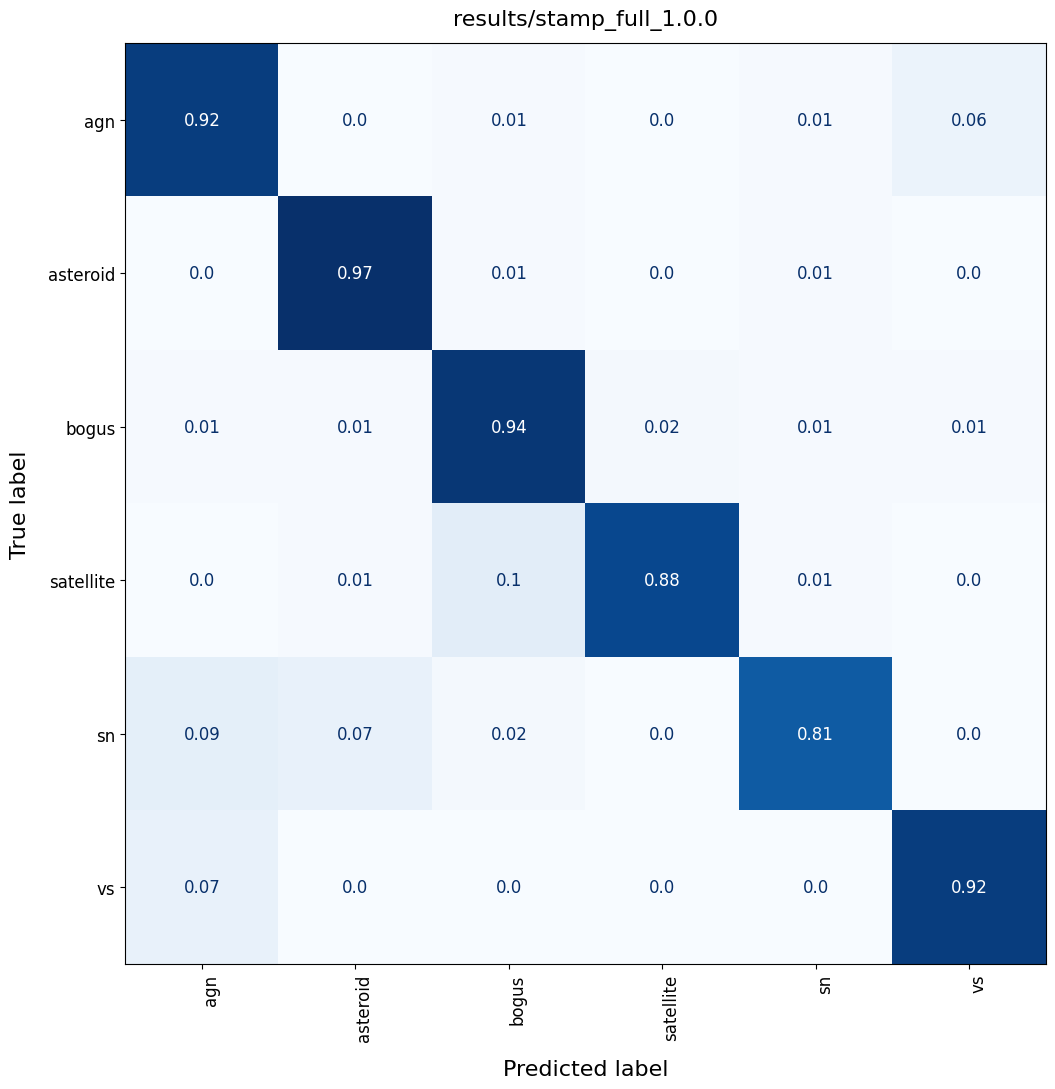

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fs = 12

cm = confusion_matrix(y_true=y_real_test, y_pred=y_pred_test, labels=order_classes, normalize='true')

cmap = plt.cm.Blues
fig, ax = plt.subplots(figsize=(11, 11)) #, dpi=110)
im = ax.imshow(np.around(cm, decimals=2), interpolation='nearest', cmap=cmap)

# color map
new_color = cmap(1.0) 

# Añadiendo manualmente las anotaciones con la media y desviación estándar
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] >= 0.005:
            #print(cm[i, j])
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)
        else:
            text = f'{np.around(cm[i, j], decimals=2)}'
            color = "white" if cm[i, j] > 0.5 else new_color  # Blanco para la diagonal, tono de azul para otras celdas
            ax.text(j, i, text, ha="center", va="center", color=color, fontsize=fs)

# Ajustes finales y mostrar la gráfica
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(np.arange(len(order_classes)))
ax.set_yticks(np.arange(len(order_classes)))
ax.set_xticklabels(order_classes)
ax.set_yticklabels(order_classes)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

title = '/'.join(path_results.split('/')[1:-1])
ax.set_title(title, fontsize=16, pad=13)
ax.set_xlabel('Predicted label', fontsize=16, labelpad=13)  # Label del eje x
ax.set_ylabel('True label', fontsize=16, labelpad=13)        # Label del eje y

ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.xaxis.labelpad = 13
ax.yaxis.labelpad = 13

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

f1 = f1_score(y_real_test, y_pred_test, average='macro')
f1

0.8784458813333257

In [33]:
report = classification_report(y_real_test, y_pred_test, output_dict=False)
print(report)

                precision    recall  f1-score   support

           AGN       0.83      0.75      0.79       591
        Blazar       0.73      0.82      0.77       289
           CEP       0.91      0.83      0.87       588
       CV/Nova       0.77      0.90      0.83       348
          DSCT       0.89      0.86      0.87       329
            EA       0.87      0.80      0.83       593
         EB/EW       0.83      0.81      0.82       591
           LPV       0.96      0.93      0.95       593
  Microlensing       0.24      0.71      0.36         7
Periodic-Other       0.52      0.53      0.53       262
           QSO       0.85      0.86      0.85       594
         RRLab       0.93      0.94      0.94       593
          RRLc       0.91      0.90      0.90       592
         RSCVn       0.74      0.80      0.77       505
          SLSN       0.33      0.66      0.44        41
          SNII       0.74      0.65      0.69       317
         SNIIb       0.09      0.08      0.08  

In [17]:
# [0.332, 0.350, ]